Primero se importan las librerías:

In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Ahora cargamos los dos archivos de conjuntos de datos.

In [2]:
heartDataCSV = pd.read_csv("heart.csv")
#heartDiseaseData = pd.read_csv("HeartDisease.csv")

print(heartDataCSV.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Se convierten los datos en un dataFrame de Pandas

In [3]:
heartData = pd.DataFrame(heartDataCSV)

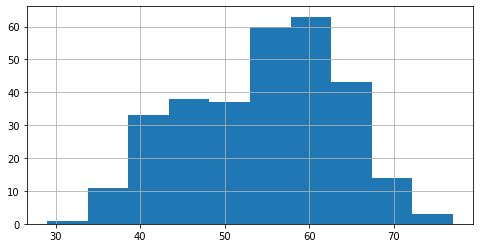

In [23]:
heartData["age"].hist(figsize=(8,4))

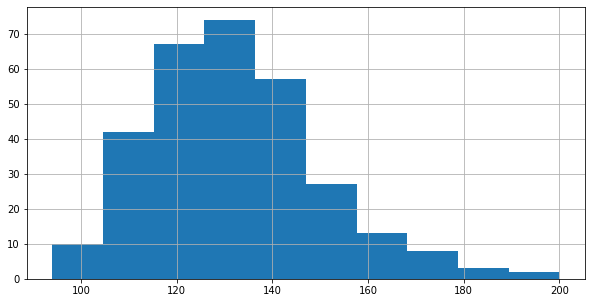

In [22]:
heartData["trestbps"].hist(figsize=(8,4))

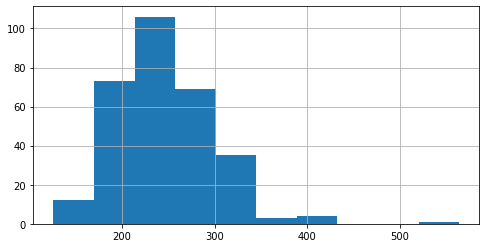

In [25]:
heartData["chol"].hist(figsize=(8,4))

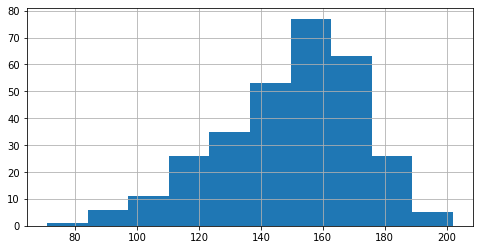

In [24]:
heartData["thalach"].hist(figsize=(8,4))

In [44]:
sums = heartData.sex.sum()
print(sums)

207
